Resumen / Storytelling - Clientes que abandonan un Banco

Iniciamos una exploración para entender la situación actual de los clientes de un Banco y analizar lo podría llegar a ser la fuga o deserción de clientes de la institución financiera.
Por ello, imagino ser parte del banco con la responsabilidad de mantener a sus clientes satisfechos y leales, entonces el objetivo principal es identificar a los clientes que están en riesgo de abandonar los productos bancarios y retenerlos.

Pero cuál es el primer paso para eso? Conocer a nuestros clientes.
Para abordar este desafío, contamos con un valioso conjunto de datos que contiene información detallada sobre nuestros clientes. Dentro del mismo, existen alguns variables clave. Exploramos variables clave como la clasificación de clientes, el rango de ingresos y la categoría de tarjeta.
Lo primero que descubrimos es que la mayoría de nuestros clientes son "Clientes Actuales" y la mayoría tiene tarjetas de categoría "Blue".

El segundo paso, es la profundización en los datos disponibles.
Continu con un análisis demográfico, incluyendo por ejemplo, el género, y encontramos una distribución equilibrada. Pero no existen grandes hallazgos por este lado.
Luego exploramos información más relacionada al comportamiento de los clientes, empezando por los contactos con el Banco. Exploramos la cantidad de veces que los clientes se han puesto en contacto con el banco en los últimos 12 meses. Y aquí aparece el primer hallazgo importante: Notamos que los clientes que abandonan tienden a tener más contactos con el banco, lo que podría indicar fricciones o problemas.

El 3er paso, consta de un análisis más profundo, implica el intento de descrubimiento de patrones, y para ello aplicamos el algoritmo K-Means para agrupar a nuestros clientes en segmentos similares.
Los resultados iniciales son que obtenemos tres clusters con diferentes características, pero no lo suficientemente claras. Evaluamos la calidad del modelo de clustering, mediante el índice Silhouette y encontramos un valor cercano a cero, lo que sugiere solapamientos entre los grupos.

Seguimos avanzando en la búsqueda de respuestas. Consideramos que el modelo no muestra diferencias claras entre los grupos de clientes, lo que plantea la necesidad de más información. Habría que considerar otras variables para mejorar la precisión del modelo de clustering y desarrollar estrategias de retención más efectivas.

Aun no es posible llegar a una conclusión. El desafío continúa: aunque hemos avanzado en la comprensión de nuestra cartera de clientes, el desafío de retener a los clientes sigue siendo un enigma.

Cuáles son los próximos pasos? Nos dirigimos hacia la búsqueda de soluciones adicionales y datos más significativos para abordar el problema del churn con mayor éxito.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Información por clientes de Banco para evaluación de posibilidad de churn.

### El dataset elegido contiene información de clientes de un banco y el objetivo es identificar a los clientes que están más cercanos a abandonar el uso de los productos del banco para darle algun tratamiento diferencial, lograr retenerlo como cliente.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objs as go



In [6]:
df_bank_churners = pd.read_csv('C:\\Users\\Ivan Kenigsberg\\OneDrive - PEIGO\\IK - DS\\a. Coder House\\Entrega 3\\BankChurners.csv',sep=',')


In [7]:
df_bank_churners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [8]:
pd.set_option('display.max_columns', None)
df_bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Contexto analítico: Como parte del banco, cuento con información de la cartera de clientes para evaluar el riesgo de abandono de cada uno de ellos, entre ellas, las principales variables con las que cuento en el dataset para tomar esta decision son las siguientes:

##### 1.Attrition_flag = clasificacion del cliente según su si es cliente actual o ya abandono
##### 2.Income_category = rango de ingresos del cliente, para priorizar acciones de retencion
##### 3.Card_category = categoría de tarjeta, para entender el tipo de clientes y posibles estrategias de retencion
##### 4.Months_on_book = antiguedad del cliente en meses
##### 5.Months_Inactive_12_mon = cantidad de meses inactivo en los ultimos 12 meses, para entender nivel de uso
##### 6.Contacts_Count_12_mon = cantidad de contactos con el banco en los ultimos 12 meses, para entender posibles problemas que haya tenido el cliente
##### 7.Credit_Limit = limite de credito del clientes, para priorizaciones y estrategias de retencion
##### 8.Avg_Utilization_Ratio = ratio de uso de la tarjeta de credito por parte del cliente

In [9]:
## Elimino las columnas que no me van a servir

columnas_delete = [
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

df_bank_churners.drop(columnas_delete, axis=1, inplace=True)

In [10]:
df_bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,0.000


In [11]:
df_bank_churners['Months_on_book'].mean()
df_bank_churners['Customer_Age'].mean()
df_bank_churners['Dependent_count'].mean()

2.3462032191172115

## Cuántos clientes tenemos?

In [12]:

clientes_totales = df_bank_churners['CLIENTNUM'].nunique()

attrition_counts = df_bank_churners['Attrition_Flag'].value_counts()

print("Clientes totales:", clientes_totales)
print("Clientes por categoría:")
print(attrition_counts)

Clientes totales: 10127
Clientes por categoría:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


## Qué tipos de clientes tenemos?

### Se quiere conocer acerca de la cartera de cientes, para entender qué tipo de clientes tiene el banco. 

### Uso gráfico de barras para entender la distribución de categorías de las tarjetas y se observa que el 93% es de categoría Blue, la más baja de todas.

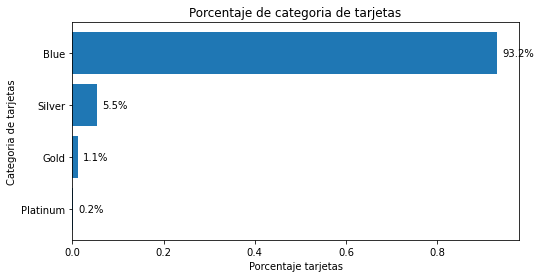

In [62]:
tarjetas_categoria = df_bank_churners['Card_Category'].value_counts()
total_tarjetas = tarjetas_categoria.sum()
porcentaje_tarjetas_categoria = (tarjetas_categoria/total_tarjetas)


# Create a bar chart with percentage labels
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(porcentaje_tarjetas_categoria.index, porcentaje_tarjetas_categoria.values)
ax.set_xlabel("Porcentaje tarjetas")
ax.set_ylabel("Categoria de tarjetas")
ax.set_title("Porcentaje de categoria de tarjetas")

# Add percentage labels to each bar
for bar, percentage in zip(bars, porcentaje_tarjetas_categoria):
    width = bar.get_width()
    ax.annotate(f'{percentage:.1%}',  # Format as percentage with one decimal place
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Offset the text slightly to the right
                textcoords="offset points",
                ha='left', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest percentage at the top
plt.show()


In [14]:
porcentaje_tarjetas_categoria

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

### Uso gráfico de barras para entender la distribución de clientes por ingresos, nuevamente la más baja ("Less than $40k") es la que tiene mayor cantidad de clientes (3561)

Text(0.5, 1.0, 'Clientes por categoria de ingresos')

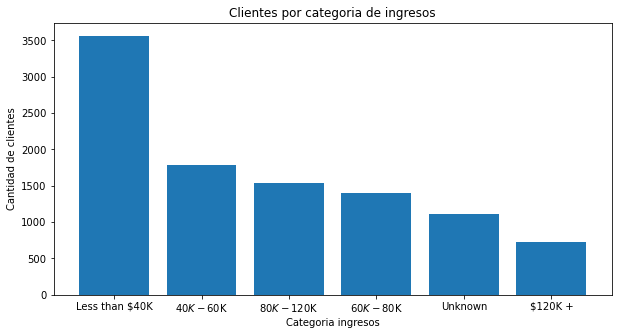

In [15]:
clientes_categoria = df_bank_churners['Income_Category'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(clientes_categoria.index, clientes_categoria.values)
ax.set_xlabel("Categoria ingresos")
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Clientes por categoria de ingresos") 

In [16]:
clientes_categoria

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

### Uso de gráfico de torta para ver si tenemos una cartera que se incline hacia algun género, para entender si vale la pena hacer análisis por género, pero está bastante balanceada.

Text(0.5, 1.0, 'Distribucion de genero')

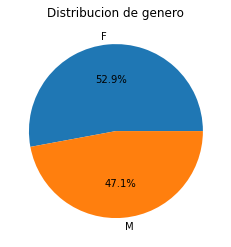

In [17]:
genero_clientes = df_bank_churners['Gender'].value_counts()

total_clientes = genero_clientes.sum()
porcentaje_genero = (genero_clientes / total_clientes) * 100

fig, ax = plt.subplots(facecolor='white')
ax.pie(porcentaje_genero, labels=porcentaje_genero.index, autopct='%1.1f%%')

ax.set_title("Distribucion de genero")

### Ya tengo nociones sobre la composición demográfica de la cartera, ahora paso a analizar las variables para entrar a un mayor nivel de entendimiento de la cartera del banco

### Uso gráfico de barras vertical apiladas, para entender la cantidadad de clientes existentes y que ya dejaron la insititucion y si hay alguna tendencia mayoritaria según el género de los clientes, pero no parece haberlo ya que está balanceado

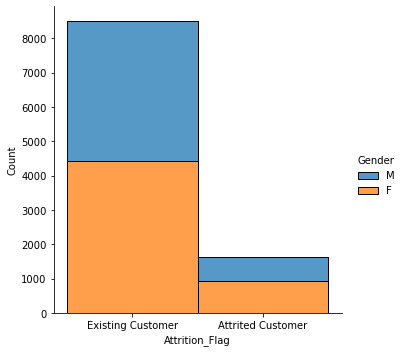

In [18]:
sns.displot(data=df_bank_churners, x="Attrition_Flag", hue="Gender",multiple="stack")


### Uso de múltiples gráficos de barras vertical para entender si existe mayor proporción de abandono según el nivel de ingresos, pero no se observan mayores diferencias. El nivel de abandono oscila entre el 13% y 17% en todos los casos.

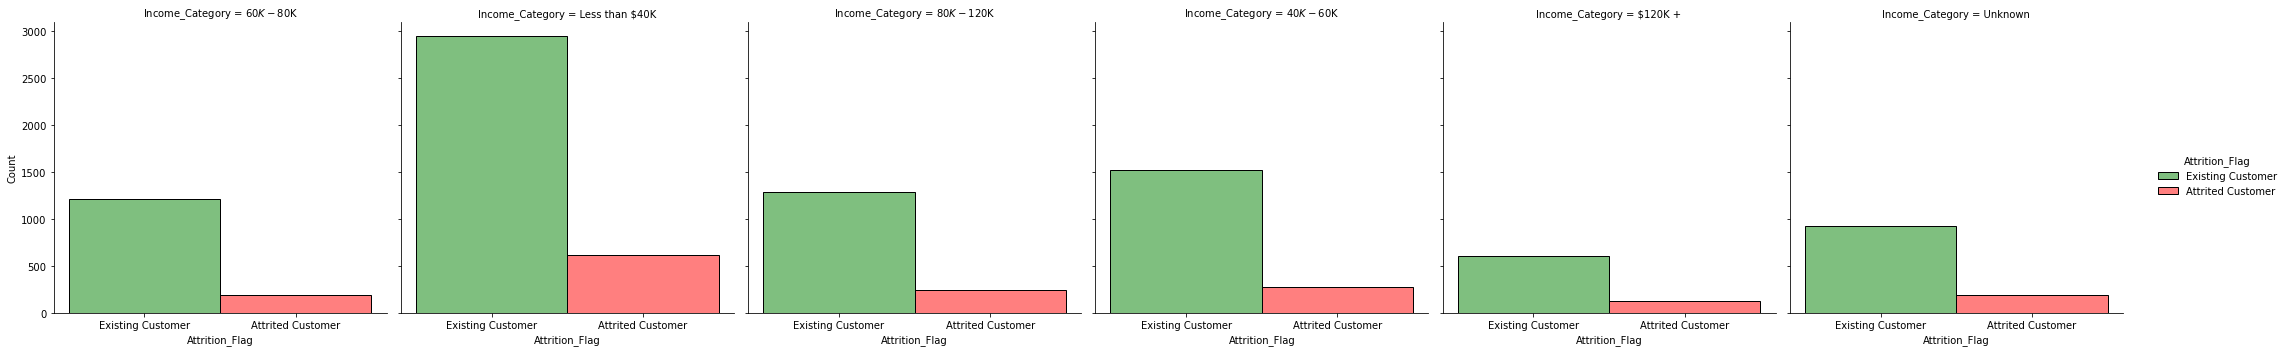

In [19]:
sns.displot(data=df_bank_churners, x="Attrition_Flag", hue="Attrition_Flag", col="Income_Category", palette=["green", "red"])

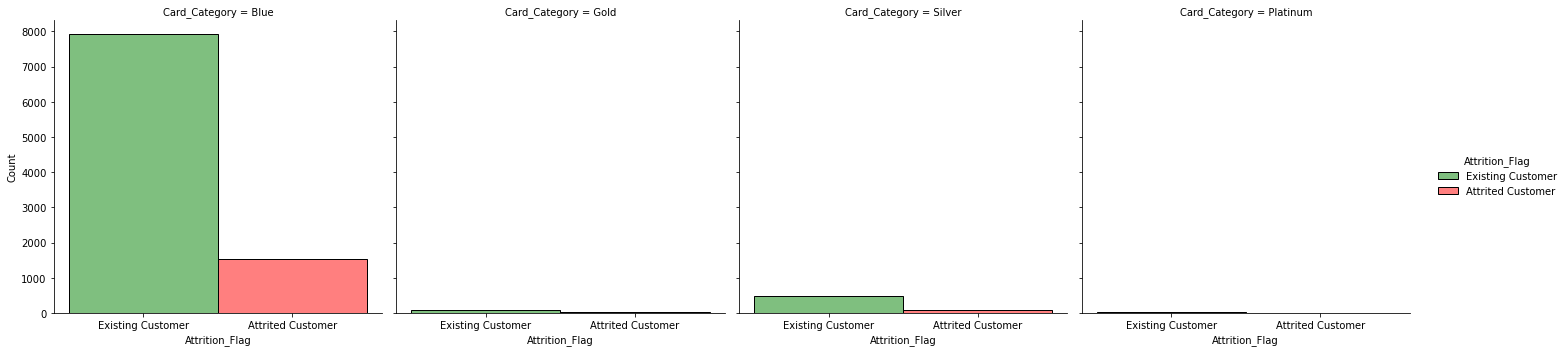

In [61]:
sns.displot(data=df_bank_churners, x="Attrition_Flag", hue="Attrition_Flag", col="Card_Category", palette=["green", "red"])

In [21]:
tarjetas_churn = df_bank_churners.groupby(['Card_Category', 'Attrition_Flag']).size().reset_index(name='Count')

# Dataframe resultante
print("Result:")
print(tarjetas_churn)

Result:
  Card_Category     Attrition_Flag  Count
0          Blue  Attrited Customer   1519
1          Blue  Existing Customer   7917
2          Gold  Attrited Customer     21
3          Gold  Existing Customer     95
4      Platinum  Attrited Customer      5
5      Platinum  Existing Customer     15
6        Silver  Attrited Customer     82
7        Silver  Existing Customer    473


### Uso de boxplot para entender si el nivel de abandono está relacionado con la cantidad de contactos de los usuarios en los últimos 12 meses (entendiendo que cada contacto con el banco es una fricción para el cliente y no una buena experiencia). Pareciera que si tiene cierta influencia ya que los que abadonan tiene una mediana mayor de contactos y más de la mitad de los que abandonan tienen mayor cantidad de contactos (entre 3 y 6) que los que no abandonan

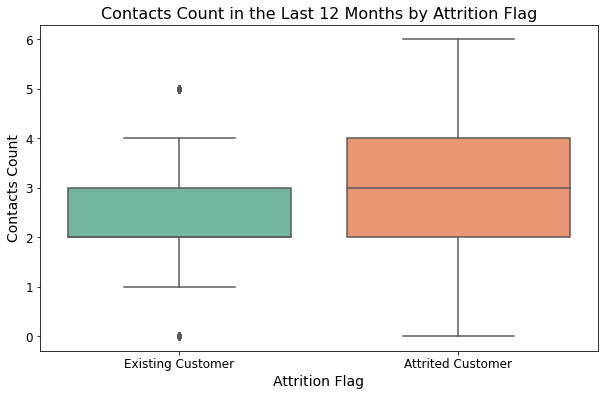

In [64]:

# Set a professional color palette
colors = sns.color_palette("Set2")

# Create a boxplot with improved aesthetics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bank_churners, x="Attrition_Flag", y="Contacts_Count_12_mon", palette=colors)
plt.title("Contacts Count in the Last 12 Months by Attrition Flag", fontsize=16)
plt.xlabel("Attrition Flag", fontsize=14)
plt.ylabel("Contacts Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

""" # Add median annotations ------- REVISAR
medians = df_bank_churners.groupby('Attrition_Flag')['Contacts_Count_12_mon'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, f'Median: {median}', horizontalalignment='center', verticalalignment='bottom', fontsize=12)
 """
# Remove grid lines
plt.grid(False)

plt.show()

### Uso de K-MEANS Clustering para encontrar grupos de clientes similares a los cuales se le podrían aplicar acciones comerciales o de marketing diferenciadas de acuerdo a sus caracteristicas

In [23]:
# Dataframes separados

numerical_columns=['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio']
categorical_columns=['Attrition_Flag','Education_Level','Marital_Status','Income_Category','Card_Category']

df_numerical = df_bank_churners[numerical_columns]
df_categorical = df_bank_churners[categorical_columns]

# Procesar data categorica
df_categorical_encoded = pd.get_dummies(df_categorical)

# Hacer el scale de data numerica
scaler = MinMaxScaler()
scaler.fit(df_numerical)
X_numerical_scaled = scaler.transform(df_numerical)

# Combinar ambos
X_scaled = np.concatenate([X_numerical_scaled, df_categorical_encoded], axis=1)


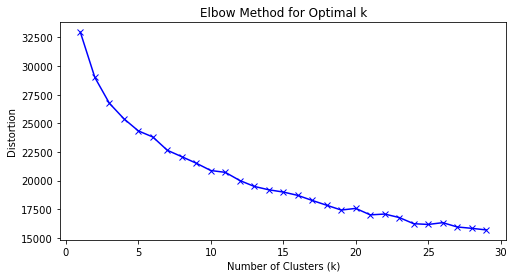

In [24]:
# Elbow plot para sacar el K optimo

distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

# Grafico el codo para encontrar el K
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()


In [25]:
## Tomo K=3

kmeans = KMeans(n_clusters=3).fit(X_numerical_scaled)
labels = kmeans.predict(X_numerical_scaled)

In [26]:
df_bank_churners['cluster'] = labels

In [27]:
df_bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,0.760,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.462,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.511,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.000,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.000,0


## Me quedan 3 clusters con la siguiente participación

In [28]:
df_bank_churners['cluster'].value_counts() / len(df_bank_churners)

1    0.483263
0    0.319344
2    0.197393
Name: cluster, dtype: float64

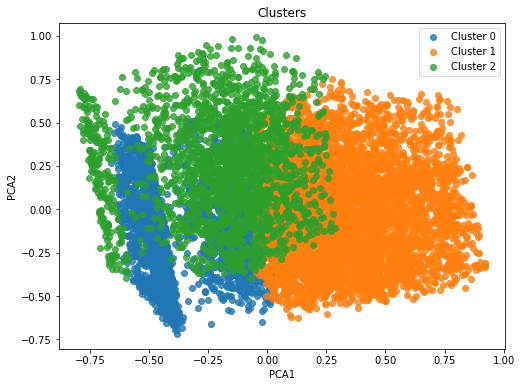

In [29]:
## Trato de reducir la dimensionalidad para facilitar la visualización y el entendimiento.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numerical_scaled)

# Graficos de clusters
plt.figure(figsize=(8, 6))
for cluster_num in df_bank_churners['cluster'].unique():
    cluster_data = df_bank_churners[df_bank_churners['cluster'] == cluster_num]
    plt.scatter(X_pca[cluster_data.index, 0], X_pca[cluster_data.index, 1], label=f'Cluster {cluster_num}', alpha=0.8)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters')
plt.legend()
plt.show()

## El modelo sirve? Uso una métrica adecuada para un modelo de no supervisado de clustering,  el silhuette score para entender la accuracy del modelo

In [30]:
silhouette_avg = silhouette_score(X_numerical_scaled, labels)
print(f"Score: {silhouette_avg:.3f}")

Score: 0.179


## El score está cercano a cero, lo que significa que los clusters se están de algun manera solapando (especialmente el 1 y el 2), por lo cual habría que buscar alternativas para poder lograr un mejor score

## Hipotesis preliminar:
## El modelo no muestra dierencias entre los grupos de clientes, puede que no existan diferencias claras entre los mismos, para la cual se necesitaría más información sobre ellos o seleccionar otras variables que muestra mayor o distinta información para poder tener un modelo con mejor score y accuracy para poder distinguir los clusters y así poder establacer distintas estrategias para atacar el problema de churn a los distintos grupos

### Data wrangling

In [31]:
df_bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,0.760,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.462,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,0.511,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.000,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,0.000,0


##### Data wrangling
##### Ya se valido anteriormente que no hubiera valores nulos y además, se eliminaron columnas innecesarias
##### Lo que se hace a continuación también se debería hacer antes de aplicar el modelo de ML

In [32]:
### Elimino duplicados si es que hay
print(df_bank_churners.shape)
df_bank_churners= df_bank_churners.drop_duplicates()
print(df_bank_churners.shape)

(10127, 17)
(10127, 17)


In [33]:
## Valido nuevamente valores nulos
print(df_bank_churners.isnull().sum())
## Se borra alguno?
df_bank_churners_cleaned = df_bank_churners.dropna()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Utilization_Ratio       0
cluster                     0
dtype: int64


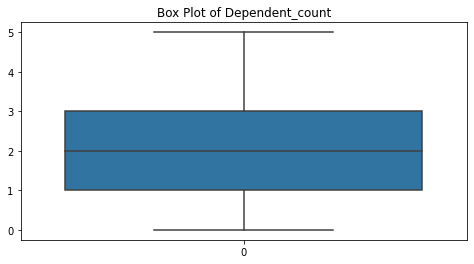

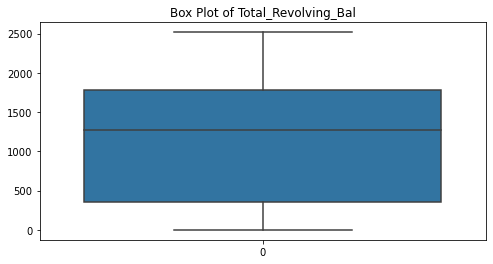

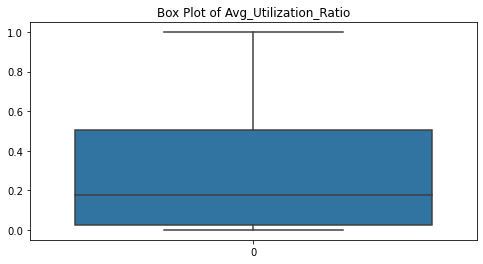

In [34]:
# Elijo las columna sobre las que quiero revisar outliers
columns_to_check = ['Dependent_count', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']

# Creo graficos para cada una de las columnas
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_bank_churners[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [35]:
## Hago group by para 3 columnas distintas 

education_count_df = df_bank_churners.groupby('Education_Level').size().reset_index(name='Count')

marital_count_df = df_bank_churners.groupby('Marital_Status').size().reset_index(name='Count')

income_count_df = df_bank_churners.groupby('Income_Category').size().reset_index(name='Count')

# Dataframes resultantes para cada uno de ellos
print("Educacion:")
print(education_count_df)

print("Estado civil")
print(marital_count_df)

print("Categorias de ingresos")
print(income_count_df)

Educacion:
  Education_Level  Count
0         College   1013
1       Doctorate    451
2        Graduate   3128
3     High School   2013
4   Post-Graduate    516
5      Uneducated   1487
6         Unknown   1519
Estado civil
  Marital_Status  Count
0       Divorced    748
1        Married   4687
2         Single   3943
3        Unknown    749
Categorias de ingresos
  Income_Category  Count
0         $120K +    727
1     $40K - $60K   1790
2     $60K - $80K   1402
3    $80K - $120K   1535
4  Less than $40K   3561
5         Unknown   1112


In [36]:
### Uso metodo apply para crear una nueva columna en el dataframe que agrupe los tipos de edcuacion
### Creo una funcion para aplicar al dataframe

def education_categories(row):
    if row['Education_Level'] in ['Doctorate', 'Post-Graduate']:
        return 'Advanced education'
    if row['Education_Level'] in ['College', 'Graduate']:
        return 'Higher education'
    else:
        return 'Basic education'

# Apply the custom function to create a new column with combined categories
df_bank_churners['Combined education'] = df_bank_churners.apply(education_categories, axis=1)

df_bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,cluster,Combined education
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,0.061,0,Basic education
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,0.105,0,Higher education
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,0.000,0,Higher education
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,0.760,1,Basic education
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,0.000,0,Basic education


In [57]:
# Calculate the percentage of clients in each combined education category
education_counts_2 = df_bank_churners['Combined education'].value_counts(normalize=True).reset_index()

education_counts_2.columns = ['Combined education', 'Percentage']

# Create a treemap using plotly.graph_objs
trace = go.Treemap(
    labels=education_counts_2['Combined education'],
    parents=['', '', '', '', ''],
    values=education_counts_2['Percentage'],
    textinfo='label+percent entry',
    marker=dict(
        colorscale='YlGnBu',
    ),
    hoverinfo='label+percent entry',
)

layout = go.Layout(
    title='% Clientes por nivel de educación',
    width=600,  # Adjust the width to make it larger
    height=400,  # Adjust the height to make it larger
    margin=dict(l=10, r=10, b=10, t=50),  # Reduce the white background by adjusting margins
    paper_bgcolor='white',  # Make the background transparent
)
fig = go.Figure(trace, layout)

# Show the treemap
fig.show()